 # Statistics for Data Science with Python Week 7

**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

### Import Libraires

In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 3
Load the dataset into a Jypter Notebook

In [2]:
#from js import fetch
#import io
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(boston_url)
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 1

Become familiar with the data set 

The following describes the dataset variables:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - \% lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## Task 4

For all visualizations, please include a title in each graph and appropriate labels


Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable


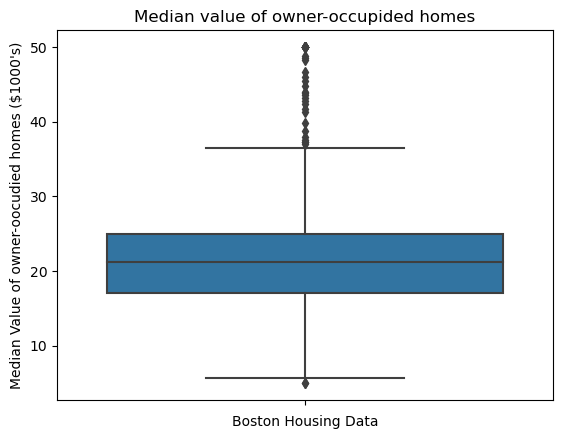

In [3]:
ax = sb.boxplot(y='MEDV', data=boston_df)
ax.set(title='Median value of owner-occupided homes')
ax.set(xlabel="Boston Housing Data", ylabel="Median Value of owner-oocudied homes ($1000's)")
plt.show()

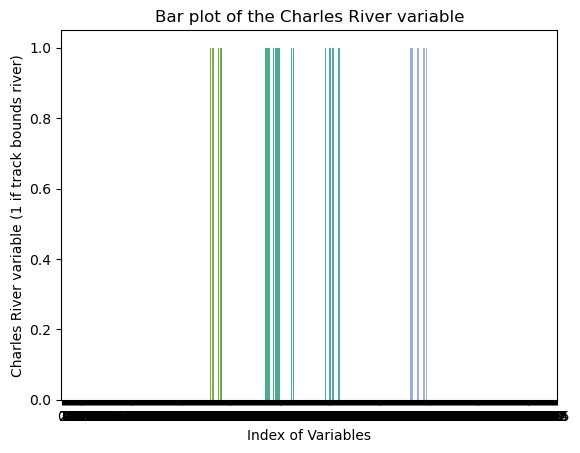

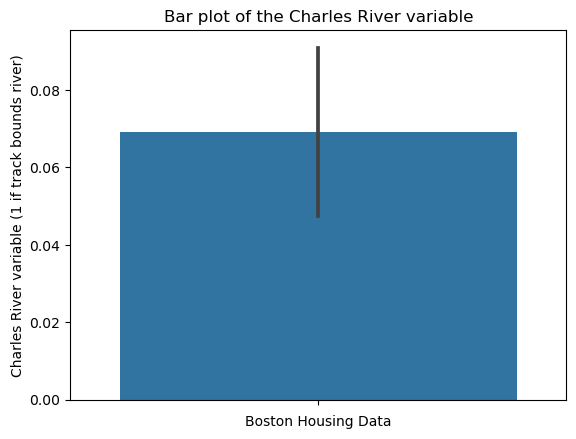

In [4]:
ax = sb.barplot(x="Unnamed: 0",y='CHAS', data=boston_df)
ax.set(title="Bar plot of the Charles River variable")
ax.set(xlabel="Index of Variables",ylabel="Charles River variable (1 if track bounds river)")
plt.show()
ax = sb.barplot(y='CHAS', data=boston_df)
ax.set(title="Bar plot of the Charles River variable")
ax.set(xlabel="Boston Housing Data",ylabel="Charles River variable (1 if track bounds river)")
plt.show()

In [5]:
bins1 = [-float('inf'),35,70,float('inf')]
labels1 = ['Less than 35','Between 35 and 70','More than 70']
boston_df['Age Range'] = pd.cut(boston_df['AGE'],bins=bins1, labels=labels1)

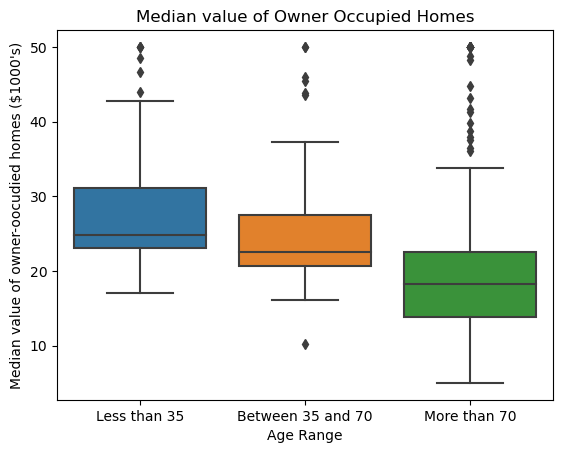

In [6]:
ax = sb.boxplot(x='Age Range',y='MEDV', data=boston_df)
ax.set(title="Median value of Owner Occupied Homes",ylabel="Median value of owner-oocudied homes ($1000's)")
plt.show()


Note: In the above data, it uses AGE variable and discretization in the question assumes the data is age in years, but the description lists it as a proportion of owner occupied houses built prior to 1940. So really it seems like it desribes a percentage of older homes occupied, and we cut on that percentage.

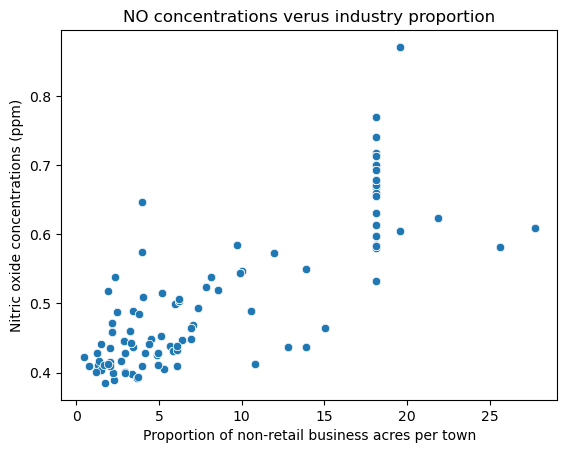

In [7]:
ax = sb.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(title="NO concentrations verus industry proportion",xlabel="Proportion of non-retail business acres per town",ylabel="Nitric oxide concentrations (ppm)")
plt.show()

The relationship between Nitric Oxcide (NO) conenctation has a positive correlation betweenthe proportion of non-retail buisiness acres per town.

C:\Users\UM-moller\AppData\Local\Temp\ipykernel_8888\791994155.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(boston_df['PTRATIO'], color='green', kde=False)


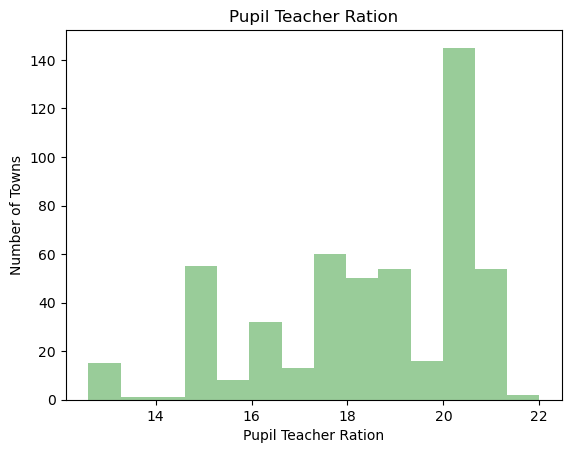

In [8]:
## use the distplot function from the seaborn library
ax = sb.distplot(boston_df['PTRATIO'], color='green', kde=False) 
ax.set(title='Pupil Teacher Ration',xlabel='Pupil Teacher Ration',ylabel='Number of Towns')
plt.show()

Number of students per town ranges from 12-21 with the most common amount of students being 20.

## Task 5
For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
*    State your hypothesis.
*    Use α = 0.05
*    Perform the test Statistics.
*    State the conclusion from the test.

### Task 5: Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**NULL Hypothesis: (H0)** There is no difference in the median value of houses bounded by the Charles river.

**Alternative Hypothesis: (H1)** There is a difference in the median value of houses bounded by the Charles river to the significance level of $\alpha=0.05$.

C:\Users\UM-moller\AppData\Local\Temp\ipykernel_8888\341203795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(boston_df['MEDV'],


[Text(0.5, 0, "MEDV ($1000's)"),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Check of Normal distirbution')]

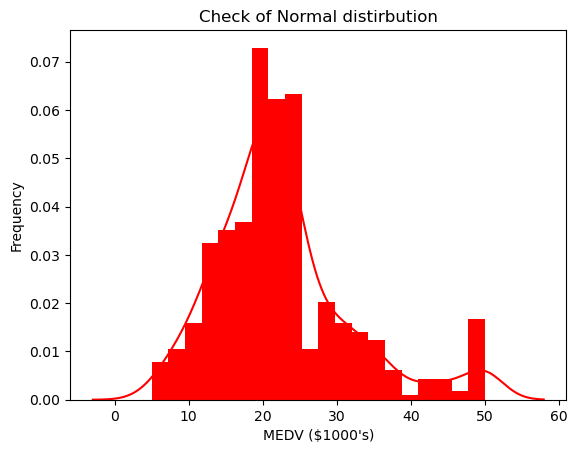

In [9]:
ax = sb.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel="MEDV ($1000's)", ylabel='Frequency',title="Check of Normal distirbution")
## we will assume it is normal even though the distribution looks non-gaussian

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we assume inequality of variance
# T-test requires the assumption of gaussian distribtuion and equal variance, but we will move on and set the equal_var to False

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                       boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value of 0.0035 (using the T-test eqaul variance set to false) is less than the significance level 0.05 we conlcude that there is not enough eveidence to reject the null hypothesis. We conclude that being bounded by the Charles River has an effect on the Median value of houses at hte 0.05 significance level. 

### Task 5: Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**NULL Hypothesis: (H0)** There is no difference in the median value (MEDV) of each proportion of owner occupied units built prior to 1940 (AGE).

**Alternative Hypothesis: (H1)**  There is a difference in the median value (MEDV) of each proportion of owner occupied units built prior to 1940 (AGE) to the significance level of $\alpha=0.05$.

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three median values means are equal)
*   $H\_1:$ At least one of the means differ

In [12]:
bins1 = [-float('inf'),35,70,float('inf')]
labels1 = ['Less than 35','Between 35 and 70','More than 70']
boston_df['Age Range'] = pd.cut(boston_df['AGE'],bins=bins1, labels=labels1)
lower = boston_df[boston_df['Age Range'] == 'Less than 35']['MEDV']
middle = boston_df[boston_df['Age Range'] == 'Between 35 and 70']['MEDV']
upper = boston_df[boston_df['Age Range'] == 'More than 70']['MEDV']
scipy.stats.levene(lower,middle,upper, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is more than 0.05, the variance is equal, we can apply ANOVA

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(lower, middle, upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the P-Value is less than 0.05 we can reject the null hypothesis and say that there is enought evidence to *conclude that one of the means of the median value of owner occupied houses differs* with the proportion of owner occupied houses built before 1970, for the gorupings of 0-35, 35-70 and 70-100 (when veiwed as a percent). 

### Task 5: Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* **H0**: There is no realationship between [NO] and proportion of non-retail business acres per town.
* **H1**: There is a correlation between [NO] and proportion of non-retail business acres per town.

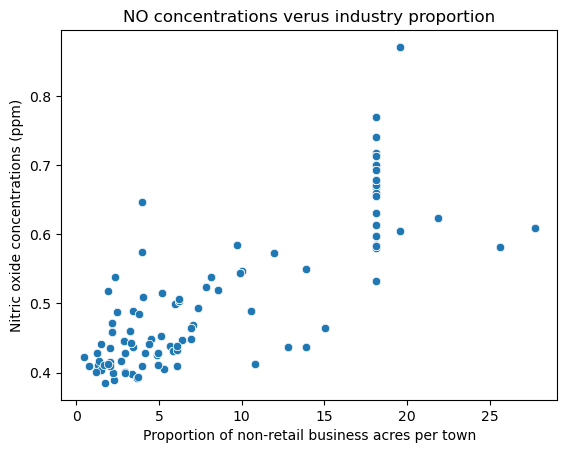

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [15]:
ax = sb.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(title="NO concentrations verus industry proportion",xlabel="Proportion of non-retail business acres per town",ylabel="Nitric oxide concentrations (ppm)")
plt.show()

scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

Since the P-value of (Significance-2 tailed) is less than 0.05, we reject the Null hypothesis and conclude that there exists a correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.

### Task 5: Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

* **H0**: The Null hypothesis is there is no impact on weighted distance to the five Bston employment centries and the median value of owner


In [18]:
X=boston_df['DIS']
Y=boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        09:55:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since Prob(F-statistic) = 1.28e-08 is less than the significance level of 0.05, we reject the null hypothesis and conclude that there exists a correlation between the weighted distance to the 5 Boston employment centres and the median value of onwer-occupied homes. 